## Brest Cancer Dataset

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
print("X.shape =", X.shape)
print("y.shape =", y.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (very important for MLP and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
clf1 = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=2000,
    random_state=1,
    early_stopping=True
)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = SVC(probability=True, kernel='rbf', random_state=1)

# Create ensemble model using soft voting
ensemble = VotingClassifier(
    estimators=[('mlp', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'
)

# Train ensemble model
ensemble.fit(X_train, y_train)

# Evaluate performance on the test set
y_pred = ensemble.predict(X_test)
print("Train accuracy: {:.3%}".format(ensemble.score(X_train, y_train)))
print("Test accuracy: {:.3%}".format(ensemble.score(X_test, y_test)))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation accuracy
X_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(ensemble, X_scaled, y, cv=5)
print("\nMean cross-validation accuracy: {:.3%}".format(cv_scores.mean()))

X.shape = (569, 30)
y.shape = (569,)
Train accuracy: 98.995%
Test accuracy: 97.661%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
 [[ 61   2]
 [  2 106]]

Mean cross-validation accuracy: 97.716%


## Signs dataset

In [ ]:
import os
import h5py
import numpy as np

path = "data"

def load_dataset():
    fn = os.path.join(path, 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

    fn = os.path.join(path, 'test_signs.h5')
    test_dataset = h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))

    return X_train, y_train, X_test, y_test, classes

In [30]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


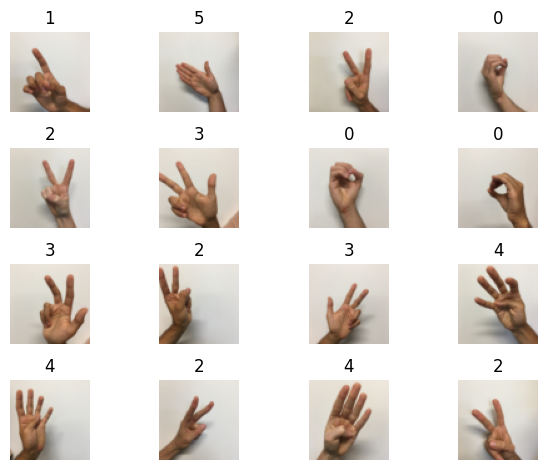

In [43]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [ ]:
X_train_scaled = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_scaled = X_test.reshape(X_test.shape[0], -1) / 255.0

print("number of training examples = " + str(X_train_scaled.shape[1]))
print("number of test examples = " + str(X_test_scaled.shape[1]))
print("X_train_scaled shape: " + str(X_train_scaled.shape))
print("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [69]:
import warnings
from sklearn.exceptions import ConvergenceWarning

clf = MLPClassifier(
    solver= 'lbfgs', 
    alpha = 2.5,
    max_iter = 3000
)

clf.fit(X_train_scaled, y_train)

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 90.000%


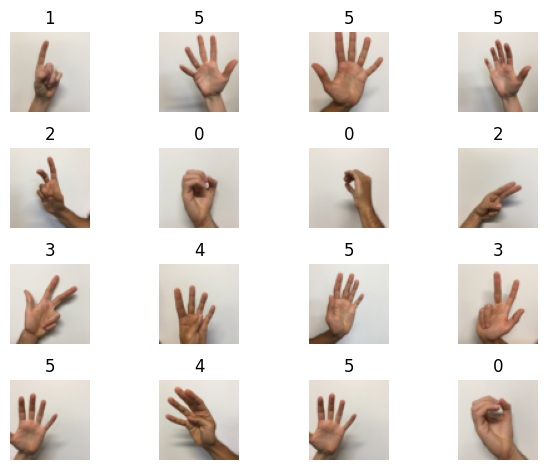

In [78]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)

In [71]:
fig = plt.gcf()
if hasattr(fig.canvas.manager, 'set_window_title'):
    fig.canvas.manager.set_window_title('Test set prediction')

<Figure size 640x480 with 0 Axes>

## Compare with SVM

In [75]:
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
